# Hate Text Detection 
### Dataset used - [Kaggle](https://www.kaggle.com/datasets/rajnikant2020/tweeter-hate-speech-sentiment-analysis)

## 1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the train CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/train.csv')

#### Show Top 5 Records

In [3]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


#### Shape of the dataset

In [4]:
df.shape

(31962, 3)

### 2 Dataset information
- id : id of tweeter user 
- label : Hateful or not  -> (0, 1)
- tweet : tweet of the user

### 3. Data Checks to perform
- `id` column has no meaning so let's drop
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column

### 3.1 Drop id column

In [5]:
df.drop('id', axis=1, inplace=True)

### 3.2 Check Missing values

In [6]:
df.isna().sum()

label    0
tweet    0
dtype: int64

#### There are no missing values in the data set

### 3.3 Check Duplicates

In [7]:
df.duplicated().sum()

np.int64(2432)

#### There are duplicates  values in the data set, drop them.

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

#### Now, there are no duplicates  values in the data set

### 3.4 Check data types

In [12]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29530 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   29530 non-null  int64 
 1   tweet   29530 non-null  object
dtypes: int64(1), object(1)
memory usage: 692.1+ KB


### 3.5 Checking the number of unique values of each column

In [13]:
df.nunique()

label        2
tweet    29530
dtype: int64

#### Insight
- From above description of data, data is highly imbalanced.

### 4. Exploring Data ( Visualization )

#### 4.1 Visualize tweets distribution to make some conclusion useing countplot.

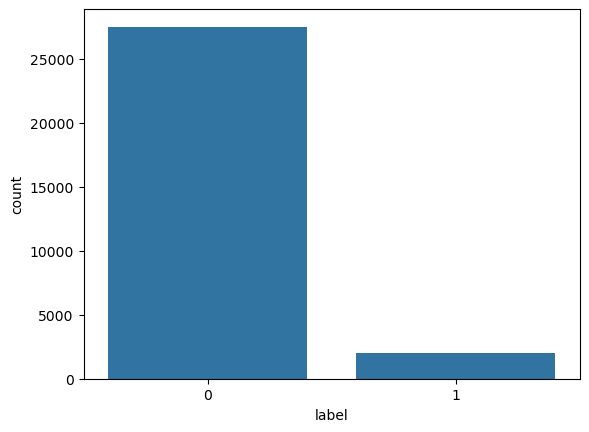

In [14]:
sns.countplot(x='label', data=df)
plt.show()

here,\
0 ---> No Hate\
1 ---> Hate\
Data is imbalanced count(0) > 50% count(1).

#### Since data imbalanced, so we merge the raw data to make it balanced.

In [17]:
raw= pd.read_csv('data/raw.csv')

In [26]:
raw.shape

(24783, 7)

In [18]:
raw.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


### Visualize the raw data

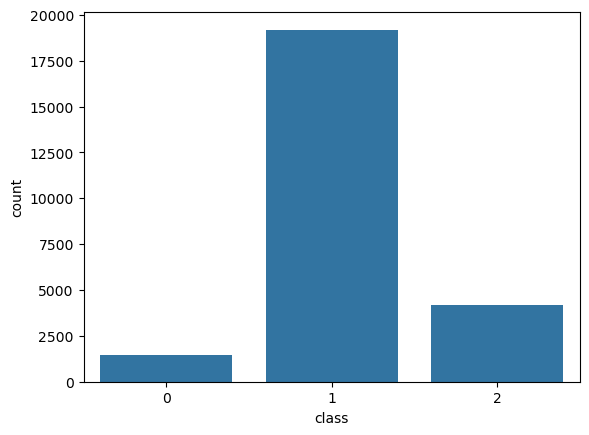

In [28]:
sns.countplot(x='class', data=raw)
plt.show()

- class 0: Hate
- class 1: Abusive
- class 2: No Hate
### Since Hate and Abusive are similar let's merge them.

In [41]:
raw.loc[raw['class'] == 0, 'class'] = 1
raw.loc[raw['class'] == 2, 'class'] = 0

### Adding columns for "Total Score" and "Average"

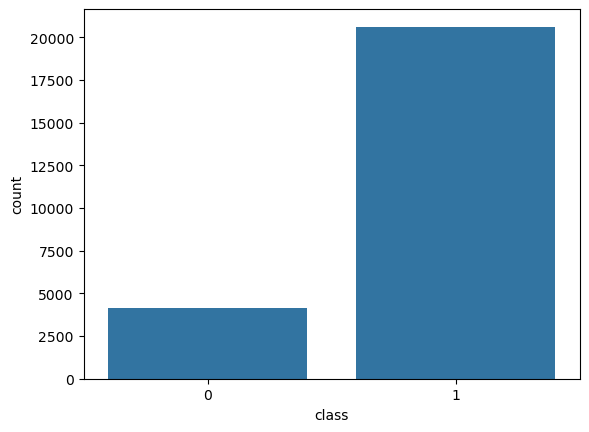

In [42]:
sns.countplot(x='class', data=raw)
plt.show()

Here,
* 0: No Hate
* 1: Hate

#### Rename the column name

In [55]:
raw.rename(columns={'class': 'label'}, inplace=True)

#### Lets drop all column except class and tweet to perfom merge of dataframes

In [56]:
raw.columns

Index(['label', 'tweet'], dtype='object')

In [ ]:
raw.drop(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'],
         axis=1, inplace=True)

#### concat the dataframes

In [58]:
new_df = pd.concat([df, raw])

In [59]:
new_df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


#### Lets finally visualize the dataframe

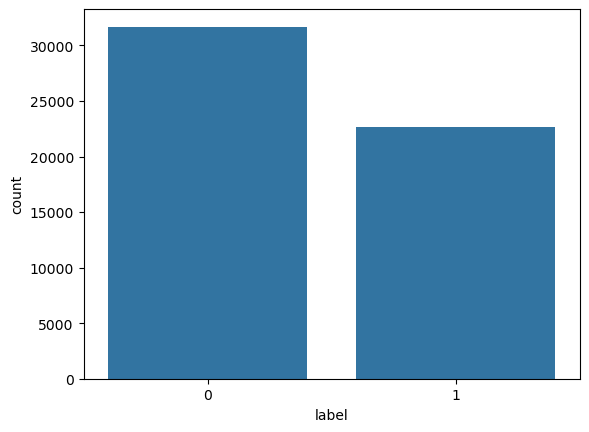

In [61]:
sns.countplot(x='label', data=new_df)
plt.show()

#####  Insights
- Our dataframe is balanced, since data is approx 1:8 ratio which is good for classification.

#### Save the data for later use

In [62]:
new_df.to_csv('data/processed.csv', index=False)

## Data Preprocessing
#### Import the libraries 

In [7]:
import re
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vihas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
df = pd.read_csv('data/processed.csv')

####  Lets apply stemming and and stopword on the data

In [9]:
stemmer = nltk.SnowballStemmer('english')
stopword = set(stopwords.words('english'))

#### Let's apply regex and do cleaning.

In [11]:
def data_cleaning(words, stopwords=stopword, stemmer=stemmer):
    words = str(words).lower()  # Convert to lowercase
    
    words = re.sub(r'\[.*?\]', '', words)  # Remove text in square brackets
  
    words = re.sub(r'https?://\S+|www\.\S+', '', words)  # Remove URLs
  
    words = re.sub(r'<.*?>', '', words)  # Remove HTML tags
  
    words = re.sub(r'[%s]' % re.escape(string.punctuation), '', words)  # Remove punctuation

    words = re.sub(r'\n', '', words)  # Remove newlines
    
    words = re.sub(r'\w*\d\w*', '', words)  # Remove words containing numbers

    words = re.sub(r'[^\x00-\x7F]+', '', str(words))  # Remove non-ASCII characters
    
    words = [word for word in words.split() if word not in stopwords]  # Remove stopwords

    words = [stemmer.stem(word) for word in words]  # Apply stemming

    words = ' '.join(words)    # Join words back into a single string
    
    return words


#### Apply the cleaning 

In [16]:
df['tweet'] = df['tweet'].apply(data_cleaning)

#### save the cleaned data for later use

In [17]:
df.to_csv('data/cleaned.csv', index=False)